* conda install -c conda-forge imbalanced-learn

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

### Version check

In [3]:
!python --version
#print(tensorflow.__version__)

Python 3.8.8


### Read and Clean dataset

In [4]:
df = pd.read_csv('bankloan.csv')
df.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
264,LP001872,Male,No,0.0,Graduate,Yes,5166,0.0,128.0,360.0,1.0,Semiurban,Y
603,LP002958,Male,No,0.0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y


In [5]:
df_safe = df.copy()

In [7]:
df = df.dropna() # drop null values
df.isna().any().sum()

0

In [8]:
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [9]:
Counter(df['Loan_Status'])['Y']/df['Loan_Status'].size

0.6916666666666667

In [10]:
pre_y = df['Loan_Status'] #target variable
pre_X = df.drop('Loan_Status', axis=1) # feature variables

#One hot encoding
en_X = pd.get_dummies(pre_X) #convert categorical variable into dummy/indicator variables
en_y = pre_y.map(dict(Y=1, N=0))

* Synthetic Minority Oversampling Technique(SMOTE): above output shows(Counter({'N': 148, 'Y': 332})) where N is minority class. SO using smote to balance class

In [20]:
smote = SMOTE(sampling_strategy='auto')
df_X, y = smote.fit_resample(en_X,en_y)

comparision: df_X vs en_X

In [15]:
sc = MinMaxScaler()
X = sc.fit_transform(df_X)

In [25]:
print(Counter(y))

Counter({0: 332, 1: 332})


In [26]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle = True)

In [27]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim = X_test.shape[1]))
model.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer='random_normal')) 

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose =0)

In [29]:
y_pred = model.predict_classes(X_test)
eval_model = model.evaluate(X_test, y_test)
print(eval_model)

5/5 [==============================] - 1s 20ms/step - loss: 0.4855 - accuracy: 0.8120
[0.4855446517467499, 0.8120300769805908]


In [30]:
y_pred = (y_pred>0.5)
#y_pred

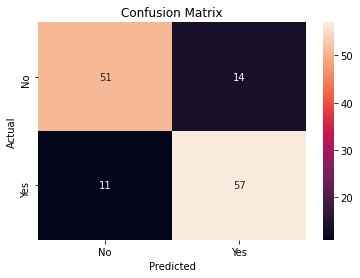

In [31]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted'); 
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']);
ax.yaxis.set_ticklabels(['No', 'Yes']);

In [32]:
accuracy_score(y_test, y_pred)

0.8120300751879699

In [33]:
from tensorflow.keras.models import load_model

model.save('loan_model.h5')

In [ ]:
## Model check

In [ ]:
from tensorflow.keras.models import load_model
mdl = load_model('loan_model.h5')

In [ ]:
test = dm_X.sample(20)
test
test.to_excel('test.xlsx', index=False)

In [ ]:
X_test = pd.read_excel('test.xlsx')

In [ ]:
X_test

In [ ]:
sc = MinMaxScaler()
X_test = sc.fit_transform(X_test)

In [ ]:
X_test

In [ ]:
X_test.shape

In [ ]:
y_pred = mdl.predict(X_test)
y_pred = (y_pred>0.58)

In [ ]:
y_pred

In [ ]:
val = pd.DataFrame(y_pred, columns=['Status'])
val = val.replace({True:'Approved', False:'Rejected'})
val

In [ ]:
col_check = pd.read_excel('test.xlsx')

col_check.columns

In [ ]:
import joblib as jb
X2 = sc.fit(X)
filename = 'scalers.pkl'
jb.dump(X2, filename)